In [ ]:
# https://www.kaggle.com/c/severstal-steel-defect-detection

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os 
import cv2
import glob as gb
import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt

: 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
l1=[]
l2=[] 
for img,ClassId,EncodedPixels in tqdm(df.values):
    image=cv2.imread("C:/Users/Wacha/Steel/train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(500, 256))
    l1.append(image)
    l2.append(ClassId)

100%|██████████| 7095/7095 [00:44<00:00, 159.90it/s]


In [4]:
X = []
for i in l1:
    i = i / 255
    i = i.astype('float16')
    X.append(i)

In [5]:
X = np.array(l1)

In [6]:
y = np.array(l2)

In [7]:
y = keras.utils.to_categorical(y)

In [8]:
y.shape

(7095, 5)

In [9]:
X.shape

(7095, 256, 500, 3)

In [10]:
sample = X[23]

In [11]:
pp_sample = tf.keras.applications.densenet.preprocess_input(sample)

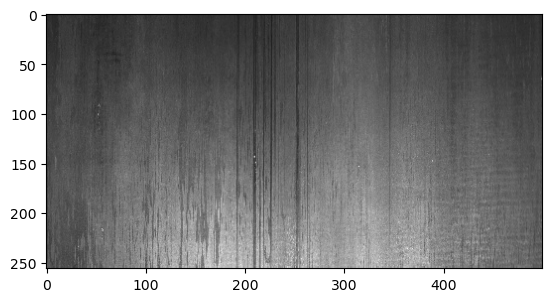

In [12]:
plt.imshow(sample)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


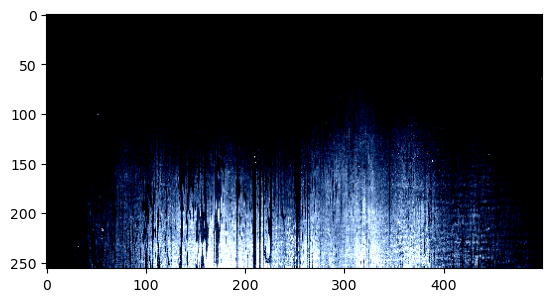

In [13]:
plt.imshow(pp_sample)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = keras.Sequential([
    
    keras.layers.Conv2D(16, kernel_size=(3, 3), input_shape=(256, 500, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(16, kernel_size=(3, 3), input_shape=(256, 500, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(256, 500, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(256, 500, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(256, 500, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(16, kernel_size=(3, 3), input_shape=(256, 500, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(5, activation='softmax')
])

In [17]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [18]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='acc')

In [22]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=np.sqrt(0.1), patience=3)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

In [23]:
model.fit(X_train, y_train, epochs=30, batch_size=32, callbacks=[reduce_lr])

Epoch 1/30
178/178 [==============================] - 79s 446ms/step - loss: 0.7113 - acc: 0.7400 - lr: 0.0010
Epoch 2/30
178/178 [==============================] - 76s 426ms/step - loss: 0.6047 - acc: 0.7558 - lr: 0.0010
Epoch 3/30
178/178 [==============================] - 76s 426ms/step - loss: 0.5285 - acc: 0.7754 - lr: 0.0010
Epoch 4/30
178/178 [==============================] - 77s 432ms/step - loss: 0.4951 - acc: 0.7903 - lr: 0.0010
Epoch 5/30
178/178 [==============================] - 77s 433ms/step - loss: 0.4600 - acc: 0.8099 - lr: 0.0010
Epoch 6/30
178/178 [==============================] - 78s 436ms/step - loss: 0.4246 - acc: 0.8206 - lr: 0.0010
Epoch 7/30
178/178 [==============================] - 76s 427ms/step - loss: 0.4112 - acc: 0.8258 - lr: 0.0010
Epoch 8/30
178/178 [==============================] - 77s 435ms/step - loss: 0.3979 - acc: 0.8305 - lr: 0.0010
Epoch 9/30
178/178 [==============================] - 76s 427ms/step - loss: 0.3640 - acc: 0.8427 - lr: 0.0010
E

In [24]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 6s 124ms/step - loss: 0.6975 - acc: 0.7907


[0.6974753737449646, 0.7906976938247681]

In [36]:
pred = []
name = []
files = gb.glob(pathname= str("C:/Users/Wacha/Steel/test_images/" + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (500, 256))
    pred.append(image_array)
    name.append(file.split('\\')[-1])

In [39]:
pred = np.array(pred)

In [40]:
pred.shape

(5506, 256, 500, 3)

In [41]:
pred = pred / 255

MemoryError: Unable to allocate 15.8 GiB for an array with shape (5506, 256, 500, 3) and data type float64

In [42]:
predictions = model.predict(pred)

173/173 [==============================] - 21s 122ms/step


In [44]:
results = []
for i in predictions:
    x = i.argmax()
    results.append(x)

In [45]:
results

[3,
 1,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 1,
 3,
 3,
 4,
 3,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 1,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 1,
 3,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 1,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 1,
 2,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 1,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 1,
 3,
 4,
 3,
 3,
 1,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 1,
 4,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 4,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 3,
 4,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 1,
 4,
 2,
 3,
 3,
 3,
 4,
 1,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 1,
 1,
 1,
 3,
 3,
 2,
 4,
 1,
 1,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 1,
 4,
 3,
 3,
 2,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,


In [60]:
sub = pd.read_csv('steel_sub.csv')

In [61]:
sub = sub.drop(['ImageId', 'ClassId'], axis=1)

In [62]:
sub['ImageID'] = name

In [63]:
sub['ClassId'] = results

In [65]:
df = sub.iloc[:, [1,0,2]]

In [67]:
df.to_csv('submission.csv')